In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from wordcloud import WordCloud

# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.utils import resample

In [3]:
country_hs4_top10 = pd.read_csv("../DATA/국가별_hs4_kor_top10.csv", index_col=0)
cols = [c for c in country_hs4_top10.columns if "수출" not in c]
top5 = country_hs4_top10.loc[:5, cols]
top5

,CN_HS4,US_HS4,VN_HS4,JP_HS4,HK_HS4,AU_HS4,TW_HS4,IN_HS4,SG_HS4,MX_HS4
1,전자집적회로(8542),승용차(8703),전자집적회로(8542),"석유,역청유(2710)",전자집적회로(8542),"석유,역청유(2710)",전자집적회로(8542),차량 부속품(8708),"석유,역청유(2710)",차량 부속품(8708)
2,레이저기기(9013),차량 부속품(8708),전화기(8517),전자집적회로(8542),전화기(8517),승용차(8703),"석유,역청유(2710)",전자집적회로(8542),전자집적회로(8542),전자기기 부속품(8529)
3,환식탄화수소(2902),전화기(8517),"석유,역청유(2710)",전화기(8517),보일러 부속품(8473),특수 선박(8905),환식탄화수소(2902),전화기(8517),"순항선,유람선,화물선(8901)",레이저기기(9013)
4,"석유,역청유(2710)",보일러 부속품(8473),전자기기 부속품(8529),은(7106),"석유,역청유(2710)",철강 구조물(7308),"반도체, 전자직접회로(8486)","석유,역청유(2710)",특수 선박(8905),도금 강판(포일)(7210)
5,"반도체, 전자직접회로(8486)","석유,역청유(2710)",인쇄회로(8534),비도금 강판(포일)(7208),"순항선,유람선,화물선(8901)",차량 부속품(8708),인쇄회로(8534),비도금 강판(포일)(7208),"반도체, 전자직접회로(8486)",승용차(8703)


In [4]:
country_hs4_top10 = pd.read_csv("../DATA/국가별_hs4_top10.csv", index_col=0)
cols = [c for c in country_hs4_top10.columns if "수출" not in c]
top5 = country_hs4_top10.loc[:5, cols]
top5

,CN_HS4,US_HS4,VN_HS4,JP_HS4,HK_HS4,AU_HS4,TW_HS4,IN_HS4,SG_HS4,MX_HS4
1,8542,8703,8542,2710,8542,2710,8542,8708,2710,8708
2,9013,8708,8517,8542,8517,8703,2710,8542,8542,8529
3,2902,8517,2710,8517,8473,8905,2902,8517,8901,9013
4,2710,8473,8529,7106,2710,7308,8486,2710,8905,7210
5,8486,2710,8534,7208,8901,8708,8534,7208,8486,8703


In [15]:
# hs4_top5의 중복 없는 코드 목록
unique_hs4_top5 = np.unique(top5.values.flatten()).tolist()  # 2d를 1a로
print(len(unique_hs4_top5))
print(unique_hs4_top5)

17
[2710, 2902, 7106, 7208, 7210, 7308, 8473, 8486, 8517, 8529, 8534, 8542, 8703, 8708, 8901, 8905, 9013]


In [23]:
countries = ['CN', 'US', 'VN', 'JP', 'HK', 'AU', 'TW', 'IN', 'SG', 'MX']
print(countries)
len(countries)

['CN', 'US', 'VN', 'JP', 'HK', 'AU', 'TW', 'IN', 'SG', 'MX']


10

In [20]:
hs4s = ['2710', '2902', '7106', '7208', '7210', '7308', '8473', '8486', '8517', '8529', '8534', '8542', '8703', '8708', '8901', '8905', '9013']
len(hs4s)

17

### 2022~2023.05 predict 파일들 불러오기

#### 자기회귀모형

In [57]:
# 자기회귀모형

predicts_ar = {}

for country in tqdm(countries):
    for hs4 in top5[f"{country}_HS4"]:
        f = f"../DATA/AR모형_데이터/Predict_{country}_{hs4}.csv"
        if os.path.isfile(f):
            df = pd.read_csv(f, index_col=0)
            predicts_ar[f"{country}-{hs4}"] = df
len(predicts_ar)

100%|██████████| 10/10 [00:00<00:00, 28.87it/s]


48

In [58]:
# 국가별모형

predicts_country = {}

for country in tqdm(countries):
    f = f"../DATA/국가별모형_데이터/Predict_{country}.csv"
    if os.path.isfile(f):
        df = pd.read_csv(f, index_col=0)
        predicts_country[f"{country}"] = df
len(predicts_country)

100%|██████████| 10/10 [00:00<00:00, 172.93it/s]


10

In [59]:
# 품목별 모형

predicts_hs4 = {}

for hs4 in tqdm(unique_hs4_top5):
    f = f"../DATA/품목별모형_데이터/Predict_{hs4}.csv"
    if os.path.isfile(f):
        df = pd.read_csv(f, index_col=0)
        predicts_hs4[f"{hs4}"] = df
len(predicts_hs4)

100%|██████████| 17/17 [00:00<00:00, 155.60it/s]


17

### 보팅 - 소프트

In [101]:
# for country in countries:
#     for hs4 in top5[f"{country}_HS4"]:

dfs = {}
for col in predicts_ar:
    print(col)
    country, hs4 = col.split("-")
    # country, hs4
    # df_ar = predicts_ar[f"{country}-{hs4}"]
    df_ar = predicts_ar[col]
    df_country = predicts_country[f"{country}"]
    df_hs4 = predicts_hs4[f"{hs4}"]

    if len(df_ar) == len(df_country) and len(df_ar) == len(df_hs4):
        df = df_ar[["True", "Proba"]].copy()
        df = df.rename({"Proba": "Proba_AR"}, axis=1)
        df["Proba_Country"] = df_country["Proba"].values
        df["Proba_HS4"] = df_hs4["Proba"].values
        
        dfs[col] = df
    else:
        print(country, hs4, "are not match")
df

CN-8542
CN-9013
CN-2902
CN-2710
CN-8486
US-8703
US-8708
US-8517
US-8473
US-2710
VN-8542
VN-8517
VN-2710
VN-8529
VN-8534
JP-2710
JP-8542
JP-8517
JP-7106
JP-7208
HK-8542
HK-8517
HK-8473
HK-2710
HK-8901
HK 8901 are not match
AU-2710
AU-8703
AU-7308
AU-8708
TW-8542
TW-2710
TW-2902
TW-8486
TW-8534
IN-8708
IN-8542
IN-8517
IN-2710
IN-7208
SG-2710
SG-8542
SG-8901
SG 8901 are not match
SG-8486
MX-8708
MX-8529
MX-9013
MX-7210
MX-8703


,True,Proba_AR,Proba_Country,Proba_HS4
기간,,,,
2022.01,0,1.000000,0.716667,0.64
2022.02,0,0.545455,0.656667,0.67
2022.03,1,1.000000,0.646667,0.57
2022.04,0,0.090909,0.670000,0.54
2022.05,1,1.000000,0.633333,0.59
2022.06,0,0.681818,0.670000,0.61
2022.07,1,0.019608,0.626667,0.63
2022.08,0,0.125000,0.640000,0.58
2022.09,1,1.000000,0.686667,0.61


In [166]:
# 소프트보팅
weights = [3, 1, 1]

vote_df = {}
           
for country_hs4 in dfs:
    print(country_hs4)
    df = dfs[country_hs4].copy()
    
    for i in range(len(df)):
        for j in range(3):
            df.iloc[i, j + 1] *= weights[j]
            
    df["Soft_prob"] = df.drop("True", axis=1).sum(axis=1) / np.sum(weights)
    func = lambda x: 0 if x < 0.5 else 1
    df["Soft_bin"] = df["Soft_prob"].apply(func)

    vote_df[country_hs4] = df
    
# df["Hard_prob"] = df.drop("True", axis=1).apply(func).mean(axis=1)
# df
df

CN-8542
CN-9013
CN-2902
CN-2710
CN-8486
US-8703
US-8708
US-8517
US-8473
US-2710
VN-8542
VN-8517
VN-2710
VN-8529
VN-8534
JP-2710
JP-8542
JP-8517
JP-7106
JP-7208
HK-8542
HK-8517
HK-8473
HK-2710
AU-2710
AU-8703
AU-7308
AU-8708
TW-8542
TW-2710
TW-2902
TW-8486
TW-8534
IN-8708
IN-8542
IN-8517
IN-2710
IN-7208
SG-2710
SG-8542
SG-8486
MX-8708
MX-8529
MX-9013
MX-7210
MX-8703


,True,Proba_AR,Proba_Country,Proba_HS4,Soft_prob,Soft_bin
기간,,,,,,
2022.01,0,3.000000,0.716667,0.64,0.871333,1
2022.02,0,1.636364,0.656667,0.67,0.592606,1
2022.03,1,3.000000,0.646667,0.57,0.843333,1
2022.04,0,0.272727,0.670000,0.54,0.296545,0
2022.05,1,3.000000,0.633333,0.59,0.844667,1
2022.06,0,2.045455,0.670000,0.61,0.665091,1
2022.07,1,0.058824,0.626667,0.63,0.263098,0
2022.08,0,0.375000,0.640000,0.58,0.319000,0
2022.09,1,3.000000,0.686667,0.61,0.859333,1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2022.01 to 2023.05
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   True           17 non-null     int64  
 1   Proba_AR       17 non-null     float64
 2   Proba_Country  17 non-null     float64
 3   Proba_HS4      17 non-null     float64
 4   Soft_prob      17 non-null     float64
 5   Soft_bin       17 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 952.0 bytes


In [190]:
func = lambda x: 0 if x < 0.5 else 1

rows = []
for country_hs4, df in vote_df.items():
    acc_soft = accuracy_score(df["True"], df["Soft_bin"])
    if len(df["True"].unique()) == 2:
        auc_soft = roc_auc_score(df["True"], df["Soft_prob"])
    else:
        auc_soft = None
    
    true_ratio = df["True"].mean()
    corr_cnt = len(df.loc[df["True"] == df["Soft_bin"]])
    # print(country_hs4, acc_soft, auc_soft, true_ratio)
    
    ar_acc = accuracy_score(df["True"], df["Proba_AR"].apply(func))
    c_acc = accuracy_score(df["True"], df["Proba_Country"].apply(func))
    hs4_acc = accuracy_score(df["True"], df["Proba_HS4"].apply(func))
    # print(ar_acc, c_acc, hs4_acc)
    # print("-")
    
    row = {}
    row["target"] = country_hs4
    row["true_ratio"] = true_ratio
    # row["match_n"] = corr_cnt
    row["acc"] = acc_soft
    row["auc"] = auc_soft
    row["acc_ar"] = ar_acc
    row["acc_country"] = c_acc
    row["acc_hs4"] = hs4_acc
    rows.append(row)
    

result = pd.DataFrame(rows)
result = result.set_index("target")
result.to_csv("./output_3.3/result_score_table.csv")
result.round(3)

,true_ratio,acc,auc,acc_ar,acc_country,acc_hs4
target,,,,,,
CN-8542,0.471,0.824,0.875,0.824,0.471,0.471
CN-9013,0.000,1.000,NaN,1.000,0.000,1.000
CN-2902,0.294,0.647,0.833,0.647,0.294,0.765
CN-2710,0.176,0.706,0.857,0.529,0.176,0.176
CN-8486,0.000,0.824,NaN,0.824,0.000,0.059
US-8703,0.941,0.824,0.938,0.824,0.941,0.941
US-8708,0.824,0.765,0.714,0.765,0.824,0.765
US-8517,0.294,0.588,0.300,0.588,0.294,0.294
US-8473,0.294,0.824,0.833,0.706,0.294,0.294


In [169]:
result.mean()

true_ratio     0.452685
acc            0.680307
auc            0.648292
acc_ar         0.649616
acc_country    0.447570
acc_hs4        0.510230
dtype: float64

In [192]:
result["Country"] = result.index.str[:2]
grp = result.groupby("Country").mean().loc[countries, :]
grp.to_csv("./output_3.3/result_country_score_table.csv")
grp

,true_ratio,acc,auc,acc_ar,acc_country,acc_hs4
Country,,,,,,
CN,0.188235,0.800000,0.855159,0.764706,0.188235,0.494118
US,0.600000,0.670588,0.638842,0.647059,0.600000,0.588235
VN,0.341176,0.647059,0.719837,0.588235,0.341176,0.423529
JP,0.423529,0.682353,0.519832,0.552941,0.423529,0.411765
HK,0.250000,0.705882,0.534392,0.720588,0.250000,0.250000
AU,0.691176,0.691176,0.581250,0.705882,0.632353,0.691176
TW,0.435294,0.611765,0.712619,0.564706,0.435294,0.470588
IN,0.564706,0.623529,0.645037,0.588235,0.564706,0.588235
SG,0.705882,0.627451,0.605556,0.666667,0.705882,0.686275


In [199]:
result["HS4"] = result.index.str[3:]
grp = result.drop("Country", axis=1).groupby("HS4").mean().sort_index()
grp.to_csv("./output_3.3/result_hs4_score_table.csv")
grp

,true_ratio,acc,auc,acc_ar,acc_country,acc_hs4
HS4,,,,,,
2710,0.542484,0.601307,0.558506,0.594771,0.522876,0.542484
2902,0.352941,0.588235,0.688095,0.588235,0.352941,0.705882
7106,0.058824,0.823529,0.093750,0.705882,0.058824,0.058824
7208,0.558824,0.676471,0.702652,0.647059,0.558824,0.558824
7210,0.352941,0.882353,0.984848,0.882353,0.352941,0.411765
7308,0.470588,0.411765,0.708333,0.529412,0.529412,0.529412
8473,0.352941,0.705882,0.773810,0.676471,0.352941,0.352941
8486,0.372549,0.686275,0.730952,0.666667,0.372549,0.352941
8517,0.235294,0.600000,0.395238,0.423529,0.235294,0.235294


#### 그래프

<Axes: >

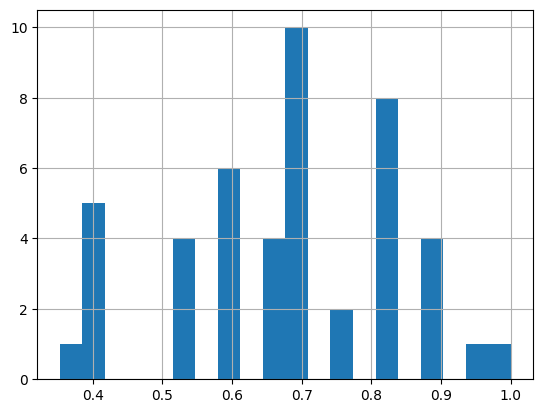

In [212]:
# acc, roc_auc 그래프
result["acc"].hist(bins=20)

<Axes: >

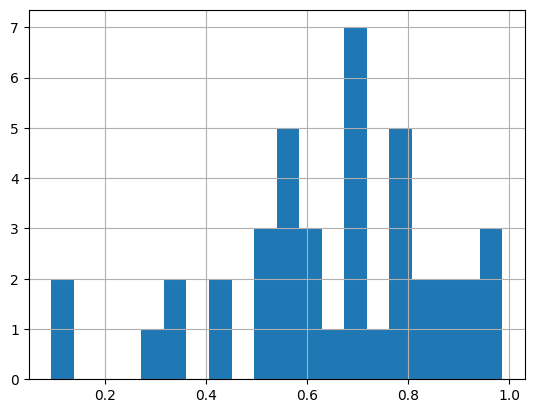

In [213]:
# acc, roc_auc 그래프
result["auc"].hist(bins=20)